<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.B - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Grafo sobre el que buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final, __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [7]:
def dfs(G, origen, destino):
    stack = [(origen, [origen])]
    visited = set()
    expanded = 0
    while stack:
        (nodo, path) = stack.pop()
        print(nodo)
        if nodo not in visited:
            if nodo == destino:
                return {'path' : path, 'expanded' : expanded}
            visited.add(nodo)
            for neighbor in G[nodo]:
                stack.append((neighbor, path + [neighbor]))
                expanded += 1

1
6
5
9
5
4
9
5
1
0
4
2
5
3
7
{'path': [1, 6, 5, 9, 4, 0, 2, 3, 7], 'expanded': 27}


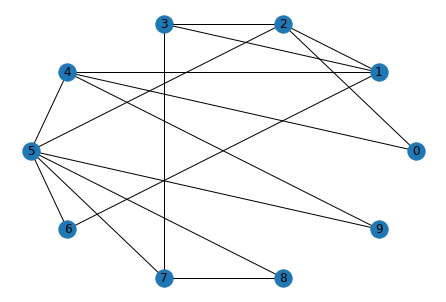

In [9]:
%matplotlib inline
import networkx as nx
G = nx.generators.barabasi_albert_graph(10, 2)
print(dfs(G, 1, 7))
nx.draw_circular(G,with_labels=True)

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Componentes conexos</p></h2>
  <p>
    Para este ejercicio deberéis implementar una función que identifique los distintos componentes conexos de un grafo. Esto es, agrupar todos los nodos que estén conectados por un camino.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual buscaremos componentes conexos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'componentes'_ __: Una lista de listas. Cada sub-lista contendrá los índices de los nodos de uno de los componentes conexos.</li>
<ul>

</p>

</div>

In [1]:
import collections
def cnx(G):
    visited = set()
    ListaConex = []
    connex_graph_list = []
    
    for node in G.nodes(): #Iteramos sobre cada nodo en el grafo
        if node in visited:
            continue #Siguiente elemento del for
        if connex_graph_list: #Si existe algo dentro de la lista 
            ListaConex.append(connex_graph_list)
        connex_graph_list = [node] #Limpiamos a cada pasada la lista de conexos
        neighbor_queue = collections.deque()
        neighbor_list_init = [n for n in G.neighbors(node)] #List comprehension de los vecinos
        for i in neighbor_list_init: #Añadimos los nodos a la lista de nodos a visitar
            neighbor_queue.append(i)
        while neighbor_queue:
            neighbor_node = neighbor_queue.popleft()
            visited.add(neighbor_node)
            
            if neighbor_node not in connex_graph_list:
                connex_graph_list.append(neighbor_node)

            aux = [n for n in G.neighbors(neighbor_node)]
            for i in aux:
                if i not in visited:
                    neighbor_queue.append(i)
                    
    ListConex.append(connex_graph_list)
    return ListaConex
    
    

[[0, 1], [0, 1], [2, 3, 5, 13, 15, 11, 4, 7, 10, 12, 8, 6, 14, 16, 9], [2, 3, 5, 13, 15, 11, 4, 7, 10, 12, 8, 6, 14, 16, 9], [17, 20, 31, 24, 28, 26, 29, 27, 30, 21, 22, 25, 19, 23, 18], [17, 20, 31, 24, 28, 26, 29, 27, 30, 21, 22, 25, 19, 23, 18], [32, 36, 34, 41, 39, 35, 40, 33, 38, 37], [32, 36, 34, 41, 39, 35, 40, 33, 38, 37], [42, 54, 44, 47, 46, 43, 49, 50, 51, 52, 48, 45, 53, 55]]


C:\Users\oriol\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


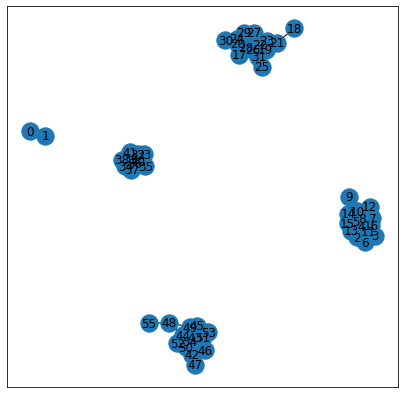

In [2]:
%matplotlib inline
from utils import draw, random_multiple_component_graph
G = random_multiple_component_graph(c=4)
print(cnx(G))
draw(G)